# Detection of cyber attack in Digital Forensics by using Machine Learning

# Package Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets Reading

In [2]:
Inputdata = pd.read_csv("Datasets_new.csv")
Inputdata

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,BwdPktLenMax,BwdPktLenMin,FwdHeaderLen,BwdHeaderLen,SubflowFwdPkts,SubflowFwdByts,SubflowBwdPkts,SubflowBwdByts,TargetOutput
0,1518,2,5,110,377,110,0,377,0,40,124,2,110,5,377,0
1,5894,4,8,168,4498,168,0,1460,0,80,184,4,168,8,4498,0
2,272,1,1,0,0,0,0,0,0,20,20,1,0,1,0,0
3,2611,4,8,322,4434,322,0,1460,0,80,184,4,322,8,4434,0
4,294,1,1,0,0,0,0,0,0,20,20,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7027,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
95,2747,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
96,4669,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
97,6197,4,8,320,4434,320,0,1460,0,80,184,4,320,8,4434,3


# Data PreProcessing

In [3]:
Inputdata.head()

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,BwdPktLenMax,BwdPktLenMin,FwdHeaderLen,BwdHeaderLen,SubflowFwdPkts,SubflowFwdByts,SubflowBwdPkts,SubflowBwdByts,TargetOutput
0,1518,2,5,110,377,110,0,377,0,40,124,2,110,5,377,0
1,5894,4,8,168,4498,168,0,1460,0,80,184,4,168,8,4498,0
2,272,1,1,0,0,0,0,0,0,20,20,1,0,1,0,0
3,2611,4,8,322,4434,322,0,1460,0,80,184,4,322,8,4434,0
4,294,1,1,0,0,0,0,0,0,20,20,1,0,1,0,0


In [4]:
Inputdata.tail()

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,BwdPktLenMax,BwdPktLenMin,FwdHeaderLen,BwdHeaderLen,SubflowFwdPkts,SubflowFwdByts,SubflowBwdPkts,SubflowBwdByts,TargetOutput
94,7027,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
95,2747,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
96,4669,1,1,0,0,0,0,0,0,20,20,1,0,1,0,3
97,6197,4,8,320,4434,320,0,1460,0,80,184,4,320,8,4434,3
98,7364,4,8,315,4434,315,0,1460,0,80,184,4,315,8,4434,3


In [5]:
Inputdata.shape

(99, 16)

In [6]:
Inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FlowDuration    99 non-null     int64
 1   TotFwdPkts      99 non-null     int64
 2   TotBwdPkts      99 non-null     int64
 3   TotLenFwdPkts   99 non-null     int64
 4   TotLenBwdPkts   99 non-null     int64
 5   FwdPktLenMax    99 non-null     int64
 6   FwdPktLenMin    99 non-null     int64
 7   BwdPktLenMax    99 non-null     int64
 8   BwdPktLenMin    99 non-null     int64
 9   FwdHeaderLen    99 non-null     int64
 10  BwdHeaderLen    99 non-null     int64
 11  SubflowFwdPkts  99 non-null     int64
 12  SubflowFwdByts  99 non-null     int64
 13  SubflowBwdPkts  99 non-null     int64
 14  SubflowBwdByts  99 non-null     int64
 15  TargetOutput    99 non-null     int64
dtypes: int64(16)
memory usage: 12.5 KB


In [7]:
Inputdata.describe()

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,BwdPktLenMax,BwdPktLenMin,FwdHeaderLen,BwdHeaderLen,SubflowFwdPkts,SubflowFwdByts,SubflowBwdPkts,SubflowBwdByts,TargetOutput
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,10797.696970,2.545455,4.636364,164.101010,2288.636364,164.101010,0.0,755.929293,0.0,50.909091,105.333333,2.545455,164.101010,4.636364,2288.636364,1.515152
std,9072.101645,1.493337,3.488917,158.905857,2224.272752,158.905857,0.0,730.405594,0.0,29.866742,81.782190,1.493337,158.905857,3.488917,2224.272752,1.119071
min,272.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,20.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,5849.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,20.000000,20.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8165.000000,4.000000,8.000000,312.000000,4434.000000,312.000000,0.0,1460.000000,0.0,80.000000,184.000000,4.000000,312.000000,8.000000,4434.000000,2.000000
75%,11394.000000,4.000000,8.000000,319.000000,4434.000000,319.000000,0.0,1460.000000,0.0,80.000000,184.000000,4.000000,319.000000,8.000000,4434.000000,2.500000
max,47635.000000,4.000000,8.000000,332.000000,4498.000000,332.000000,0.0,1460.000000,0.0,80.000000,184.000000,4.000000,332.000000,8.000000,4498.000000,3.000000


In [8]:
Inputdata.value_counts('TargetOutput')

TargetOutput
1    25
2    25
3    25
0    24
dtype: int64

In [9]:
Inputdata.columns

Index(['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMax', 'FwdPktLenMin', 'BwdPktLenMax',
       'BwdPktLenMin', 'FwdHeaderLen', 'BwdHeaderLen', 'SubflowFwdPkts',
       'SubflowFwdByts', 'SubflowBwdPkts', 'SubflowBwdByts', 'TargetOutput'],
      dtype='object')

In [10]:
Inputdata = Inputdata.dropna()

In [11]:
Inputdata = Inputdata.fillna(0)

In [12]:
Inputdata.isna().sum()

FlowDuration      0
TotFwdPkts        0
TotBwdPkts        0
TotLenFwdPkts     0
TotLenBwdPkts     0
FwdPktLenMax      0
FwdPktLenMin      0
BwdPktLenMax      0
BwdPktLenMin      0
FwdHeaderLen      0
BwdHeaderLen      0
SubflowFwdPkts    0
SubflowFwdByts    0
SubflowBwdPkts    0
SubflowBwdByts    0
TargetOutput      0
dtype: int64

In [40]:
Inputdata1 = Inputdata['TargetOutput']
Inputdata1

0     0
1     0
2     0
3     0
4     0
     ..
94    3
95    3
96    3
97    3
98    3
Name: TargetOutput, Length: 99, dtype: int64

In [41]:
Inputdata1 = np.array(Inputdata1)
Inputdata1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

# Data Visualization : EDA Analysis

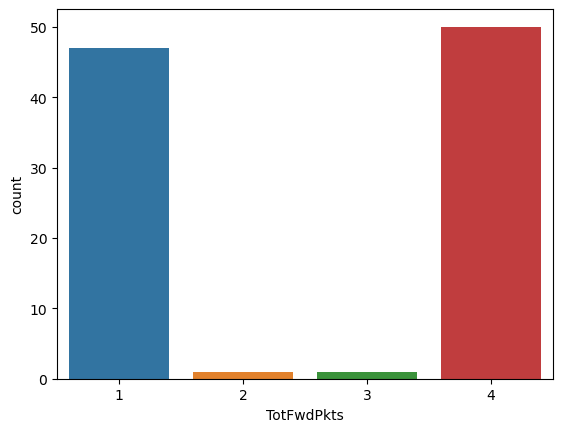

In [13]:
sns.countplot(x ='TotFwdPkts', data = Inputdata)
plt.show()

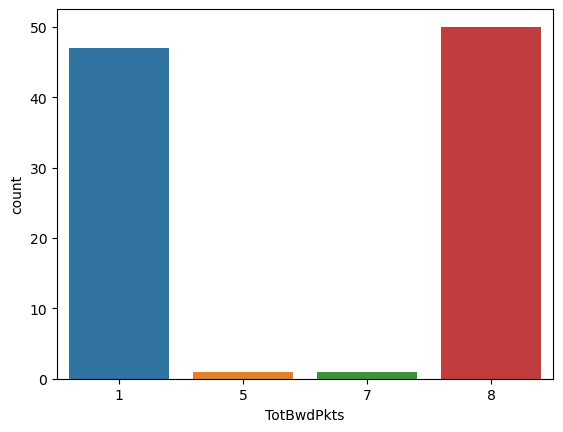

In [14]:
sns.countplot(x = 'TotBwdPkts', data = Inputdata)
plt.show()

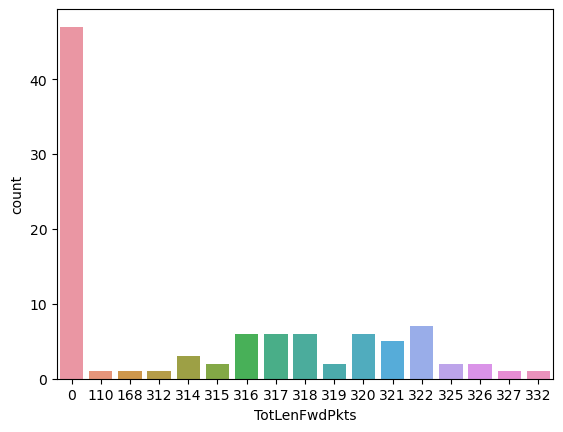

In [15]:
sns.countplot(x = 'TotLenFwdPkts', data = Inputdata)
plt.show()

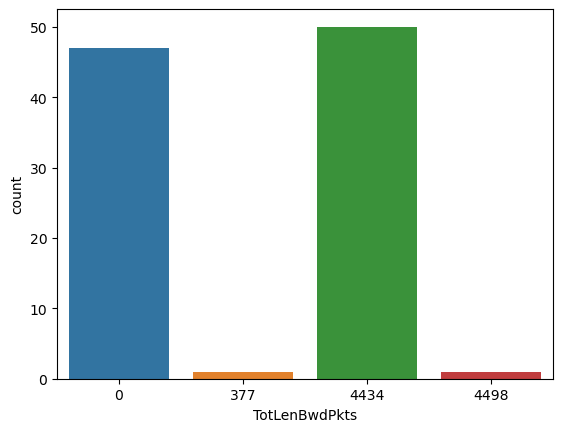

In [16]:
sns.countplot(x = 'TotLenBwdPkts', data = Inputdata)
plt.show()

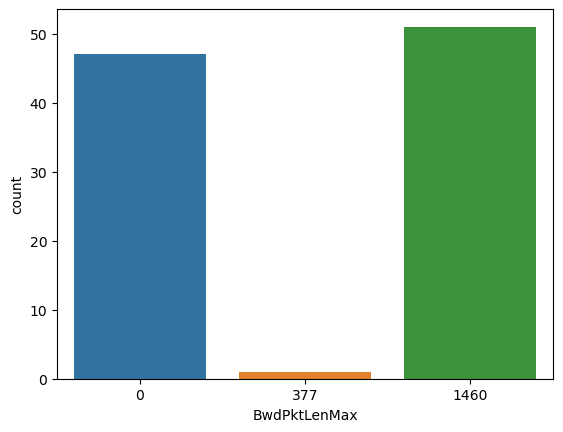

In [17]:
sns.countplot(x = 'BwdPktLenMax', data = Inputdata)
plt.show()

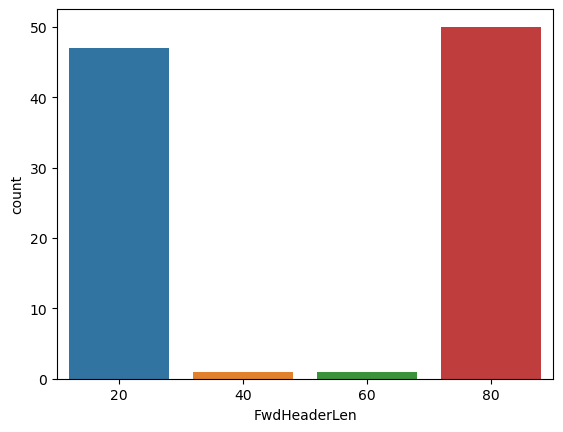

In [18]:
sns.countplot(x = 'FwdHeaderLen', data = Inputdata)
plt.show()

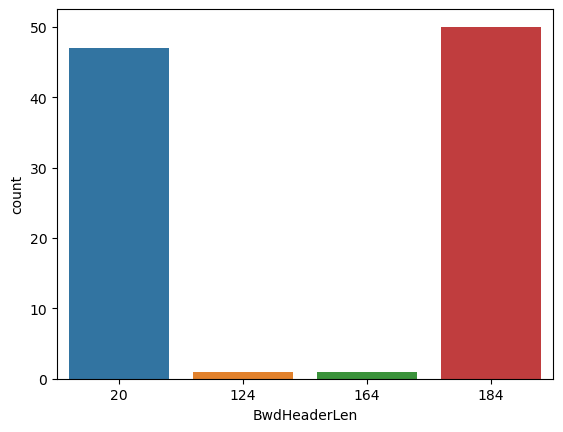

In [19]:
sns.countplot(x = 'BwdHeaderLen', data = Inputdata)
plt.show()

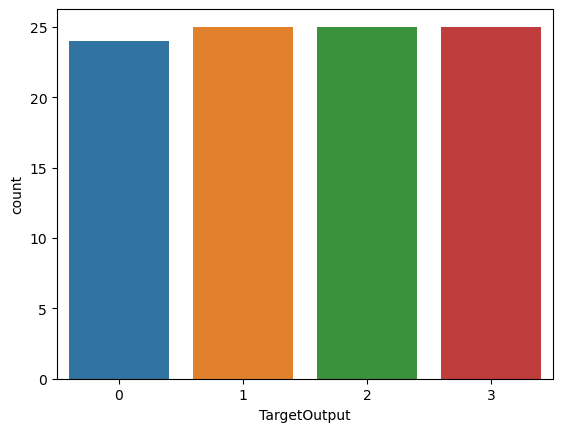

In [20]:
sns.countplot(x = 'TargetOutput', data = Inputdata) 
plt.show()

In [21]:
Inputdata.columns

Index(['FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts',
       'TotLenBwdPkts', 'FwdPktLenMax', 'FwdPktLenMin', 'BwdPktLenMax',
       'BwdPktLenMin', 'FwdHeaderLen', 'BwdHeaderLen', 'SubflowFwdPkts',
       'SubflowFwdByts', 'SubflowBwdPkts', 'SubflowBwdByts', 'TargetOutput'],
      dtype='object')

In [22]:
import warnings
warnings.filterwarnings('ignore')

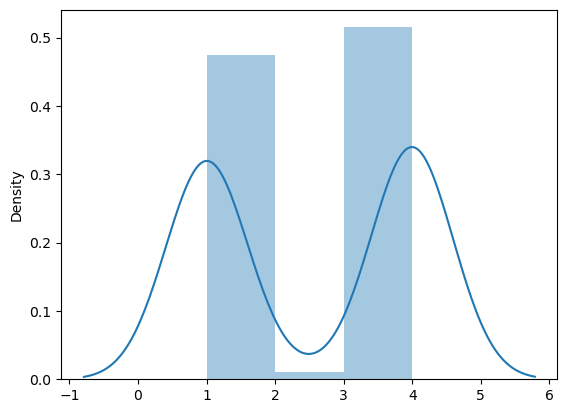

In [23]:
sns.distplot(x=Inputdata['TotFwdPkts'])
plt.show()

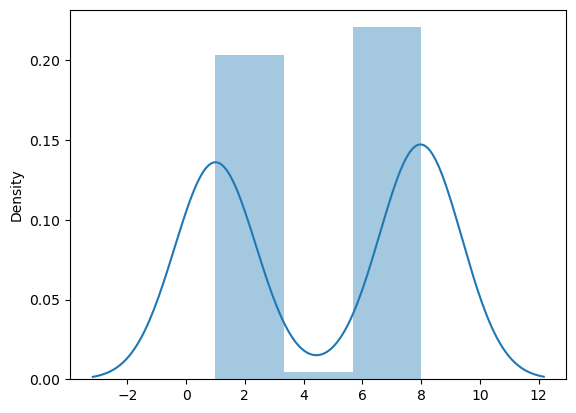

In [24]:
sns.distplot(x=Inputdata['TotBwdPkts'])
plt.show()

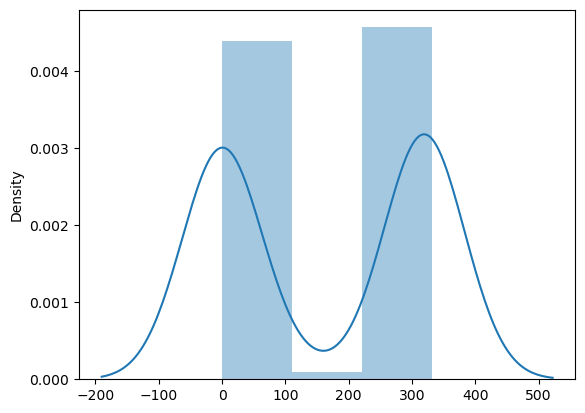

In [25]:
sns.distplot(x=Inputdata['TotLenFwdPkts'])
plt.show()

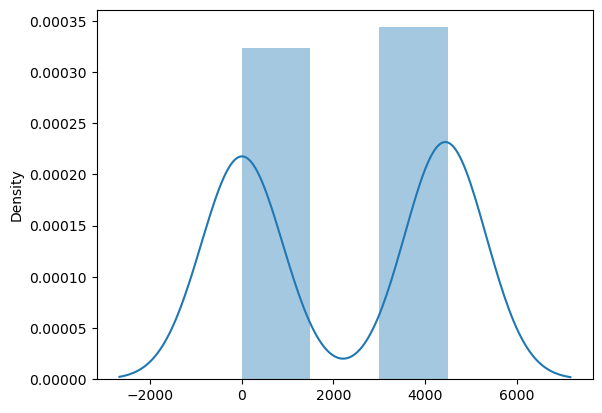

In [26]:
sns.distplot(x=Inputdata['TotLenBwdPkts'])
plt.show()

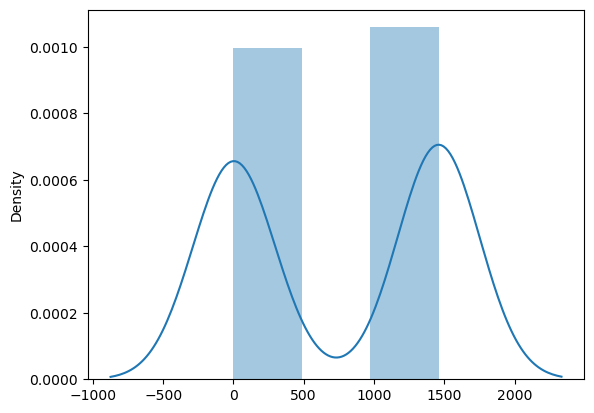

In [27]:
sns.distplot(x=Inputdata['BwdPktLenMax'])
plt.show()

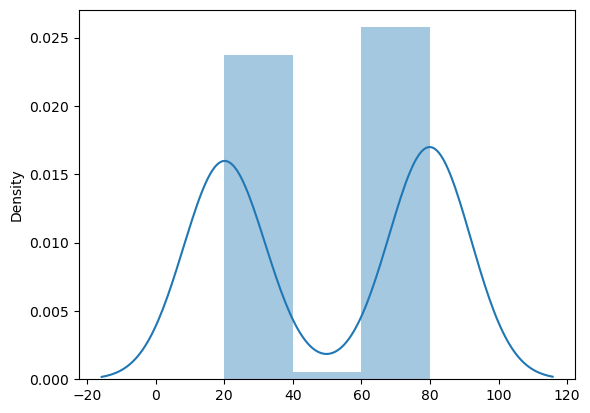

In [28]:
sns.distplot(x=Inputdata['FwdHeaderLen'])
plt.show()

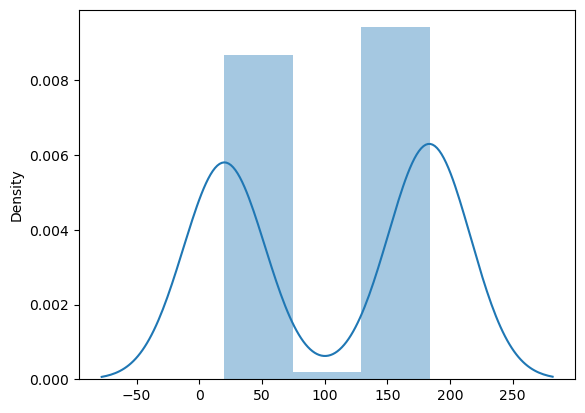

In [29]:
sns.distplot(x=Inputdata['BwdHeaderLen'])
plt.show()

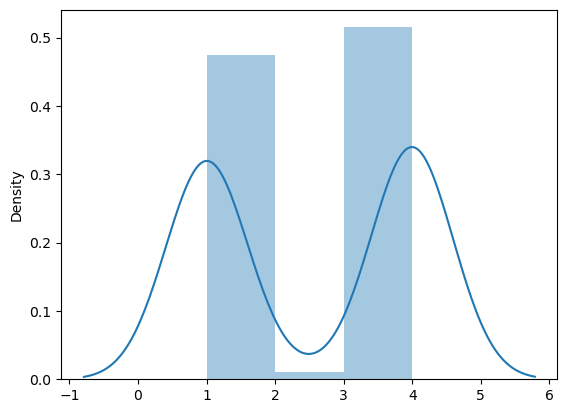

In [30]:
sns.distplot(x=Inputdata['SubflowFwdPkts'])
plt.show()


In [31]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Inputdata)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Implementation

In [32]:
Input = Inputdata.drop('TargetOutput', axis=1)
Input

,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,BwdPktLenMax,BwdPktLenMin,FwdHeaderLen,BwdHeaderLen,SubflowFwdPkts,SubflowFwdByts,SubflowBwdPkts,SubflowBwdByts
0,1518,2,5,110,377,110,0,377,0,40,124,2,110,5,377
1,5894,4,8,168,4498,168,0,1460,0,80,184,4,168,8,4498
2,272,1,1,0,0,0,0,0,0,20,20,1,0,1,0
3,2611,4,8,322,4434,322,0,1460,0,80,184,4,322,8,4434
4,294,1,1,0,0,0,0,0,0,20,20,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7027,1,1,0,0,0,0,0,0,20,20,1,0,1,0
95,2747,1,1,0,0,0,0,0,0,20,20,1,0,1,0
96,4669,1,1,0,0,0,0,0,0,20,20,1,0,1,0
97,6197,4,8,320,4434,320,0,1460,0,80,184,4,320,8,4434


In [33]:
Output = Inputdata['TargetOutput']
Output

0     0
1     0
2     0
3     0
4     0
     ..
94    3
95    3
96    3
97    3
98    3
Name: TargetOutput, Length: 99, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Input, Output,test_size=0.3)

In [35]:
X_train.shape

(69, 15)

In [36]:
X_test.shape

(30, 15)

In [37]:
Y_train.shape

(69,)

In [38]:
Y_test.shape

(30,)

# Random Forest Algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier()
RF_model.fit(X_train,Y_train)
RF_model_Prediction = RF_model.predict(X_test)
Accuracy_RF = accuracy_score(RF_model_Prediction,Y_test)
print("Accuracy Score of Random Forest Algorithm",Accuracy_RF)

Accuracy Score of Random Forest Algorithm 0.36666666666666664
